In [7]:
#importing the libraties
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the data
df = pd.read_csv("spam.csv")

In [5]:
df.sample(8)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1198,ham,Al he does is moan at me if n e thin goes wron...,NaN,NaN,NaN
4329,ham,i thought we were doing a king of the hill thi...,NaN,NaN,NaN
1356,ham,U ned to convince him tht its not possible wit...,NaN,NaN,NaN
1618,ham,The 2 oz guy is being kinda flaky but one frie...,NaN,NaN,NaN
629,spam,Todays Vodafone numbers ending with 4882 are s...,NaN,NaN,NaN
2837,ham,Were trying to find a Chinese food place aroun...,NaN,NaN,NaN
1986,ham,S..antha num corrct dane,NaN,NaN,NaN
981,ham,Reckon need to be in town by eightish to walk ...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

# Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


As we can clearly see there are lots of missing values in last three features so we can drop them cause they are not contributing much.

In [11]:
#droping last three columns
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True,axis=1)

In [12]:
df.sample(6)

,v1,v2
2304,ham,Friendship poem: Dear O Dear U R Not Near But ...
4764,ham,if you text on your way to cup stop that shoul...
5239,ham,"Jay wants to work out first, how's 4 sound?"
2227,ham,Oh k.k..where did you take test?
200,ham,I sent you &lt;#&gt; bucks
3071,ham,Ok lor... But buy wat?


In [16]:
# now we will rename the columns.
df.rename({"v1":"target","v2":"text"},axis=1,inplace=True)

In [17]:
df.sample(10)

,target,text
1918,ham,Is fujitsu s series lifebook good?
4233,ham,Now only i reached home. . . I am very tired n...
1655,ham,At 7 we will go ok na.
4534,ham,IM LATE TELLMISS IM ON MY WAY
5275,ham,Oh yeah clearly it's my fault
938,spam,Urgent! call 09061749602 from Landline. Your c...
2021,ham,"I don't have anybody's number, I still haven't..."
1463,ham,Ok good then i later come find �_... C lucky i...
198,ham,Hi its Kate how is your evening? I hope i can ...
4249,ham,How much for an eighth?


In [18]:
# now we can replace the content of target with the number
df["target"] = df["target"].replace({"ham":0,"spam":1})

In [23]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
#checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [22]:
#checking for diplicate values
df.duplicated().sum()

403

As we can see there are 403 duplicate values,so will drop the duplicates values

In [26]:
# dropiing all duplicates
df = df.drop_duplicates(keep="first")

In [27]:
df.duplicated().sum()

0

In [29]:
df.shape

(5169, 2)

# EDA(Exploretry Data Analysis)

In [30]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x15b021d8820>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Ham'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

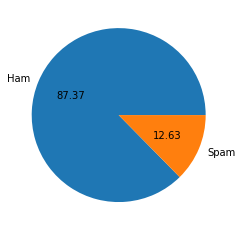

In [33]:
plt.pie(df["target"].value_counts(),labels=["Ham","Spam"],autopct="%0.2f")

So from pie chart we can clearly observe that data is imbalanced.

first will try to analyze our text and will try to find how many words,alphabates and sentense are there

In [37]:
import nltk

In [38]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# will make three new columns now 
1.no of characters in the sms
2.no of words in sms
3.no of sentense in sms

In [41]:
# first will find no of total characters in sms
df["num_characters"] = df["text"].apply(len)

<ipython-input-41-2c0f94a23c68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_characters"] = df["text"].apply(len)


In [44]:
df.sample(10)

,target,text,num_characters
4177,0,Two teams waiting for some players,34
3806,0,Pls dont restrict her from eating anythin she ...,74
1843,0,Super da:)good replacement for murali,37
2790,1,U�۪ve Bin Awarded �50 to Play 4 Instant Cash. ...,127
2185,0,Purity of friendship between two is not about ...,142
1591,0,That's my honeymoon outfit. :),30
3510,0,I'm serious. You are in the money base,38
1661,0,"You aren't coming home between class, right? I...",75
1340,0,Might ax well im there.,23
3104,0,Or remind me in a few hrs.,26


In [51]:
# now will try to find no of words
df["num_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-51-160f518c6f78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))


In [54]:
# now will try to find no of sentense
df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-54-cf3f6cef12e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))


nltk.word_tokenize will break the text word by word////
nltk.sent_tokenize will break the text by sentense

In [56]:
#Now we will check some descriptive stats to get better idea of data
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [59]:
#indiusal of ham class
df[df["target"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [58]:
df[df["target"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


from this describe we can clearly see that the spam sms are bigger in lenght comparitvely than ham ,we can see this using histogram 

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

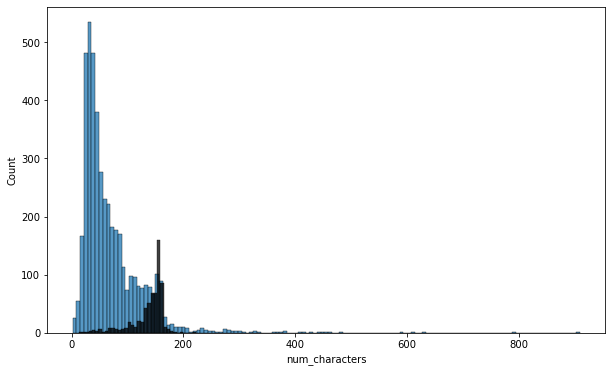

In [73]:
plt.figure(figsize=(10,6))
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"],color="black")

<AxesSubplot:xlabel='num_words', ylabel='Count'>

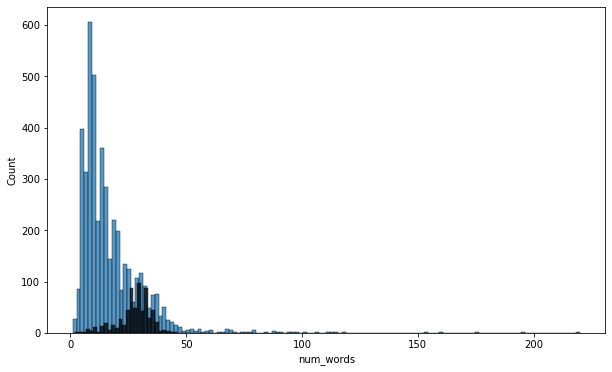

In [74]:
plt.figure(figsize=(10,6))
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"],color="black")

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

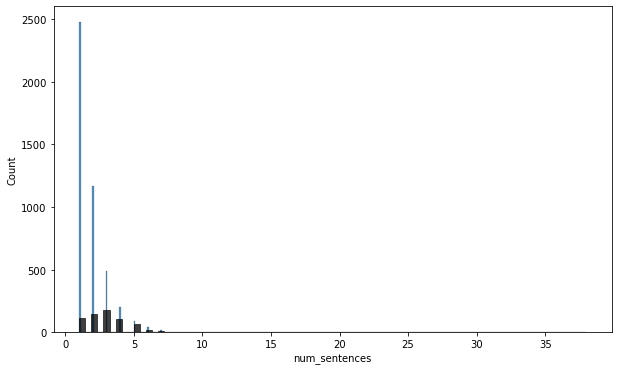

In [76]:
plt.figure(figsize=(10,6))
sns.histplot(df[df["target"]==0]["num_sentences"])
sns.histplot(df[df["target"]==1]["num_sentences"],color="black")

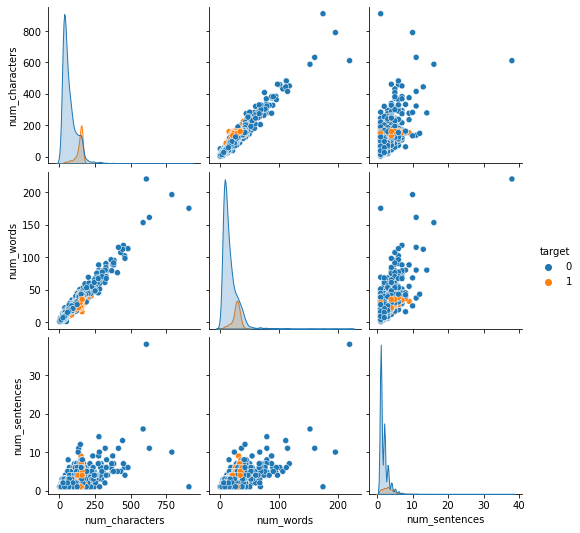

In [77]:
#now will check the relation ship of the features with the target variable
sns.pairplot(df,hue="target")

In [78]:
# check the corelation
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.382785,0.263143,0.269132
num_characters,0.382785,1.000000,0.966087,0.626197
num_words,0.263143,0.966087,1.000000,0.680924
num_sentences,0.269132,0.626197,0.680924,1.000000


<AxesSubplot:>

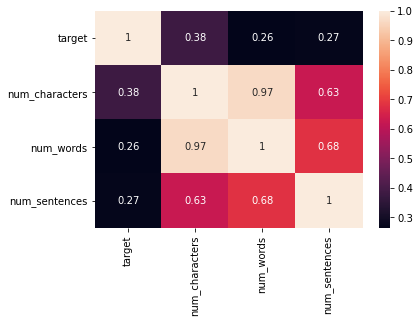

In [79]:
sns.heatmap(df.corr(),annot=True)

we can see from the heat map num_characters and num_word having high positive corelation

# Data Pre-Processing
.Lower Case
.Tokenization
.Removing Special Characters
.Removing Stop words and puntuations
.Steaming

the data pre-pprocessing fro text include all above steps so instaed of doing all steps manually we will try to write one function and that function will do all steps .

In [93]:
#this are all the stopwords in english which we will remove
from nltk.corpus import stopwords
stopwords.words("english")


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [94]:
#this all are puntuations which we will remove
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [98]:
# this is steming used to cut short and make it in root form the word like following
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("having")

'have'

In [108]:
def transform_text(text):
    text = text.lower()# to convert text into lower case
    text = nltk.word_tokenize(text)# will convert text into words
    
    y=[]
    for i in text:
        if i.isalnum():#To remove special characters
            y.append(i)
            
    text= y[:]
    y.clear()
    
    for i in text:#to remove all stopwords and punctuations
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:#to get stemming
        y.append(ps.stem(i))
        
    return " ".join(y)# it will give the text in sentence form not in list

In [115]:
#now will apply the transform_text function to the text

In [116]:
df["text"].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [117]:
df["transformed_text"] = df["text"].apply(transform_text)

<ipython-input-117-f432dfe648e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"] = df["text"].apply(transform_text)


In [118]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Now will try to find the top 30 words in both the class that is in spam and ham to get a deep idea about words

In [119]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [127]:
#for spam 
spam_corpus = []
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
    

In [129]:
len(spam_corpus)

9941

In [137]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


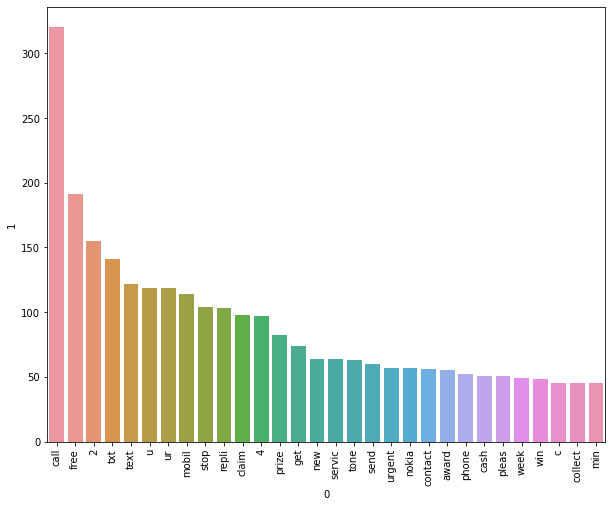

In [164]:
#now will plot a bar plot to visualize
plt.figure(figsize=(10,8))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [149]:
#same will do with ham as well
ham_corpus=[]
for msg in df[df["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [153]:
len(ham_corpus)

35303

In [161]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


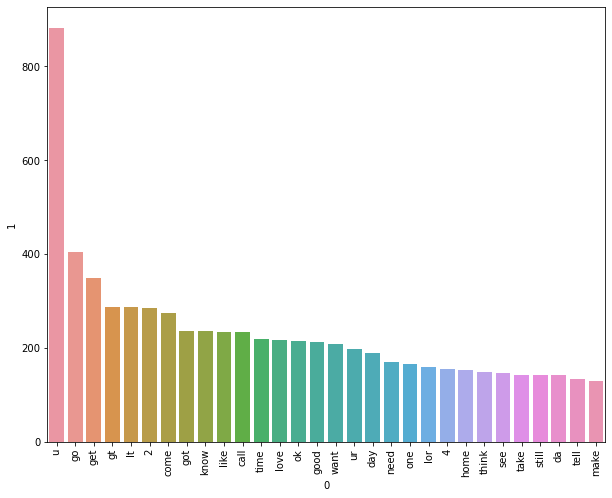

In [166]:
#now will plot a bar plot to visualize
plt.figure(figsize=(10,8))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [169]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [175]:
# we can do it by another way as well by using wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="black")

In [176]:
spam_wc = wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

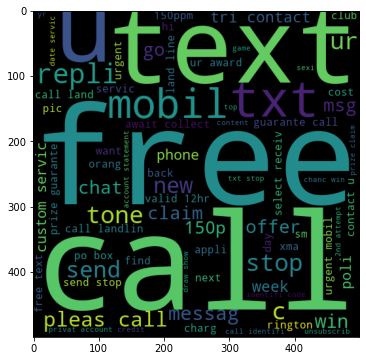

In [178]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [181]:
#for ham
ham_wc = wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

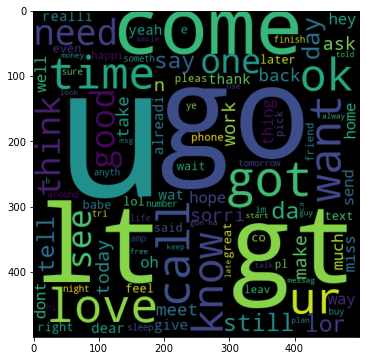

In [182]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

Now we can clealy see in both the images that most occuring words in spam and ham,will move towards model building

# Model Building

To build the model first we have all the data in numeric format since our target is in numeric already but our transformed_text is not in numeric format so will convert it into numeric format

In [183]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [185]:
#Creating X
X = cv.fit_transform(df["transformed_text"]).toarray()# we used to array cause we get the output as sparce array
X.shape

(5169, 6677)

In [186]:
#Creating Y
Y = df["target"].values

In [187]:
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

Now we have got X and Y both and in Numeric form so will apply train test split

In [188]:
#train test split
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size=0.2,random_state=2)

In [189]:
#creating object 
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [190]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [194]:
# now we will trai the model for GassianNB
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score

cfm = confusion_matrix(Y_test,Y_pred1)
print(cfm)

print("classification report")

print(classification_report(Y_test,Y_pred1))

acc = accuracy_score(Y_test,Y_pred1)
print("Accuracy of the model:",acc)

print("precision_score",precision_score(Y_test,Y_pred1))

[[790 106]
 [ 20 118]]
classification report
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       896
           1       0.53      0.86      0.65       138

    accuracy                           0.88      1034
   macro avg       0.75      0.87      0.79      1034
weighted avg       0.92      0.88      0.89      1034

Accuracy of the model: 0.8781431334622823
precision_score 0.5267857142857143


In [196]:
# now we will trai the model for Multinomial
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score

cfm = confusion_matrix(Y_test,Y_pred2)
print(cfm)

print("classification report")

print(classification_report(Y_test,Y_pred2))

acc = accuracy_score(Y_test,Y_pred1)
print("Accuracy of the model:",acc)

print("precision_score",precision_score(Y_test,Y_pred2))

[[872  24]
 [ 12 126]]
classification report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       896
           1       0.84      0.91      0.87       138

    accuracy                           0.97      1034
   macro avg       0.91      0.94      0.93      1034
weighted avg       0.97      0.97      0.97      1034

Accuracy of the model: 0.965183752417795
precision_score 0.84


In [197]:
# now we will trai the model for Multinomial
bnb.fit(X_train,Y_train)
Y_pred3 = bnb.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score

cfm = confusion_matrix(Y_test,Y_pred3)
print(cfm)

print("classification report")

print(classification_report(Y_test,Y_pred3))

acc = accuracy_score(Y_test,Y_pred1)
print("Accuracy of the model:",acc)

print("precision_score",precision_score(Y_test,Y_pred3))

[[894   2]
 [ 27 111]]
classification report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.98      0.80      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034

Accuracy of the model: 0.965183752417795
precision_score 0.9823008849557522


# Now we will try to find with the TfidVectorizer

In [214]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(max_features=3000)

In [216]:
#Creating X
X = tfid.fit_transform(df["transformed_text"]).toarray()# we used to array cause we get the output as sparce array
X.shape

(5169, 3000)

In [217]:
#Creating Y
Y = df["target"].values

In [218]:
#train test split
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size=0.2,random_state=2)

In [219]:
# now we will trai the model for GassianNB
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score

cfm = confusion_matrix(Y_test,Y_pred1)
print(cfm)

print("classification report")

print(classification_report(Y_test,Y_pred1))

acc = accuracy_score(Y_test,Y_pred1)
print("Accuracy of the model:",acc)

print("precision_score",precision_score(Y_test,Y_pred1))

[[788 108]
 [ 26 112]]
classification report
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       896
           1       0.51      0.81      0.63       138

    accuracy                           0.87      1034
   macro avg       0.74      0.85      0.77      1034
weighted avg       0.91      0.87      0.88      1034

Accuracy of the model: 0.8704061895551257
precision_score 0.509090909090909


In [220]:
# now we will trai the model for Multinomial
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score

cfm = confusion_matrix(Y_test,Y_pred2)
print(cfm)

print("classification report")

print(classification_report(Y_test,Y_pred2))

acc = accuracy_score(Y_test,Y_pred1)
print("Accuracy of the model:",acc)

print("precision_score",precision_score(Y_test,Y_pred2))

[[896   0]
 [ 29 109]]
classification report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.79      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034

Accuracy of the model: 0.8704061895551257
precision_score 1.0


In [221]:
# now we will trai the model for Multinomial
bnb.fit(X_train,Y_train)
Y_pred3 = bnb.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score

cfm = confusion_matrix(Y_test,Y_pred3)
print(cfm)

print("classification report")

print(classification_report(Y_test,Y_pred3))

acc = accuracy_score(Y_test,Y_pred1)
print("Accuracy of the model:",acc)

print("precision_score",precision_score(Y_test,Y_pred3))

[[895   1]
 [ 16 122]]
classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.88      0.93       138

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Accuracy of the model: 0.8704061895551257
precision_score 0.991869918699187


In [224]:
import pickle
pickle.dump(tfid,open("vectorizer.pkl","wb"))

In [226]:
pickle.dump(mnb,open("model.pkl","wb"))